In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\Rahel\Moonlight-Energy-Optimization\notebooks


In [8]:
df = pd.read_csv(r'C:\Users\Rahel\Moonlight-Energy-Optimization\data\benin-malanville.csv')

print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [9]:
# Summary statistics for numerical columns
print(df.describe())


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [10]:
# Summary for all columns, including object types
print(df.describe(include='all'))


               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-08-08 23:44            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000  525600.000000  525600.000000  

In [11]:
# Count of missing values in each column
print(df.isnull().sum())


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [12]:
# Missing value percentage per column
missing_percent = df.isnull().mean() * 100
print(missing_percent)


Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [13]:
# Combined missing value count and percentage
missing_report = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': df.isnull().mean() * 100
})
print(missing_report)


               Missing Count  Missing %
Timestamp                  0        0.0
GHI                        0        0.0
DNI                        0        0.0
DHI                        0        0.0
ModA                       0        0.0
ModB                       0        0.0
Tamb                       0        0.0
RH                         0        0.0
WS                         0        0.0
WSgust                     0        0.0
WSstdev                    0        0.0
WD                         0        0.0
WDstdev                    0        0.0
BP                         0        0.0
Cleaning                   0        0.0
Precipitation              0        0.0
TModA                      0        0.0
TModB                      0        0.0
Comments              525600      100.0


In [14]:
# Loop through numerical columns and identify outliers using IQR
numerical_cols = df.select_dtypes(include=['number']).columns

outliers = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = len(outlier_rows)

# Show number of outliers per column
print("Outlier count per numerical column:")
print(outliers)


Outlier count per numerical column:
{'GHI': 145, 'DNI': 15196, 'DHI': 8733, 'ModA': 98, 'ModB': 240, 'Tamb': 222, 'RH': 0, 'WS': 6717, 'WSgust': 5368, 'WSstdev': 107372, 'WD': 0, 'WDstdev': 7251, 'BP': 10288, 'Cleaning': 485, 'Precipitation': 3789, 'TModA': 1, 'TModB': 257, 'Comments': 0}


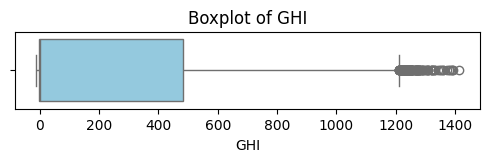

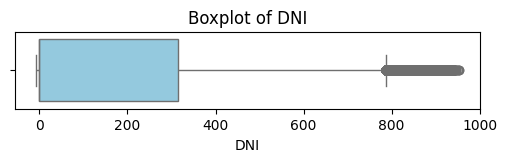

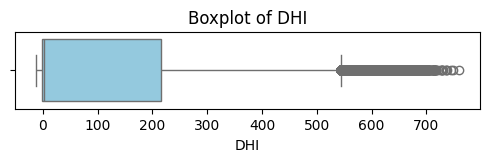

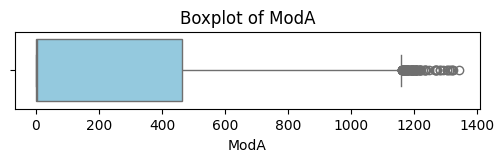

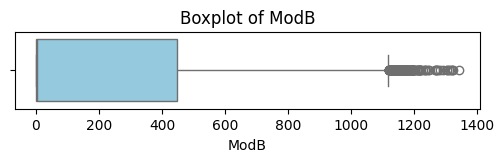

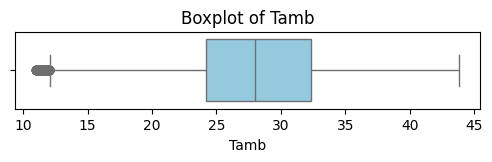

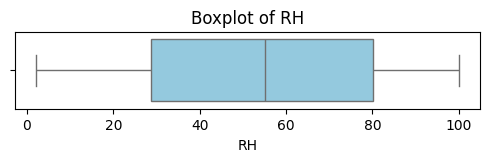

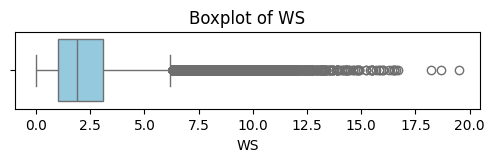

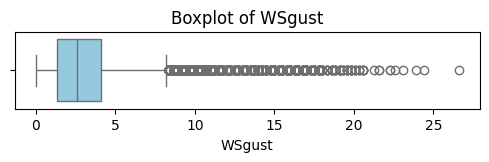

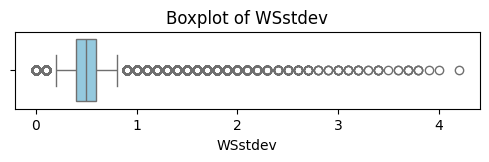

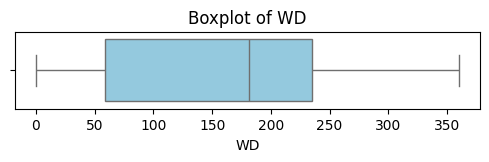

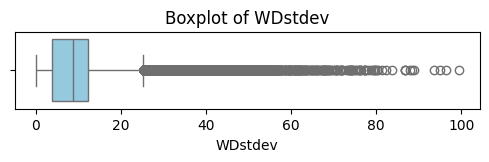

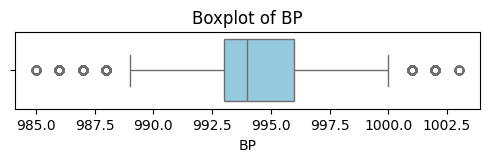

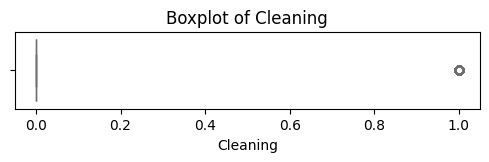

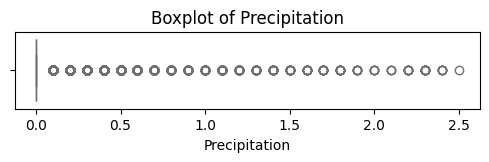

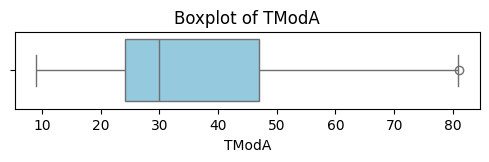

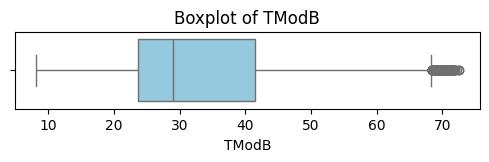

ValueError: List of boxplot statistics and `positions` values must have same the length

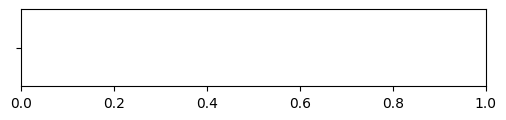

In [15]:
# Boxplots for all numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()